In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

In [46]:
path = os.environ.get('GQPMC_DIR')+'mini_mocha/ispeculator/james'
print(path)

/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ispeculator/james


In [47]:
non_stationary = path + '/1e-4.hdf5'
stationary = path + '/1e-2.hdf5'

In [48]:
f_ns = h5py.File(non_stationary,'r')
f_s = h5py.File(stationary,'r')

In [49]:
f_ns.keys()

<KeysViewHDF5 ['flux_photo_data', 'flux_photo_ivar_data', 'flux_photo_model', 'flux_spec_data', 'flux_spec_ivar_data', 'flux_spec_model', 'mcmc_chain', 'model', 'prior_range', 'redshift', 'theta_1sig_minus', 'theta_1sig_plus', 'theta_2sig_minus', 'theta_2sig_plus', 'theta_med', 'theta_names', 'wavelength_data', 'wavelength_model']>

In [84]:
mcmc_ns = f_ns['mcmc_chain'][...][:,0]
prior_ns = f_ns['prior_range'][...]
tt_ns = f_ns['theta_names'][...]
mcmc_s = f_s['mcmc_chain'][...][:,0]
prior_s = f_s['prior_range'][...]
tt_s = list(f_s['theta_names'][...].astype(str))

In [60]:
print(f_ns['mcmc_chain'][...].shape)

(240000, 9)


In [61]:
prior_s[0]

array([ 8., 13.])

In [59]:
print(prior_s.shape)

(9, 2)


In [51]:
print(mcmc_ns.shape)

(240000,)


In [57]:
stat_idx = [0,1,3,12,15,17,18,19,21,23,25,26,29,31,36,39]

In [72]:
len(stat_idx)

16

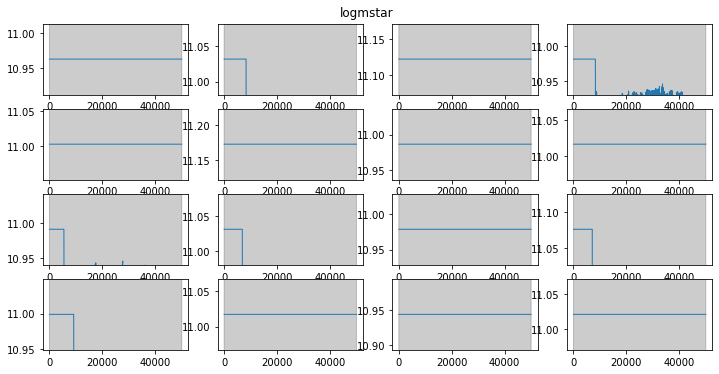

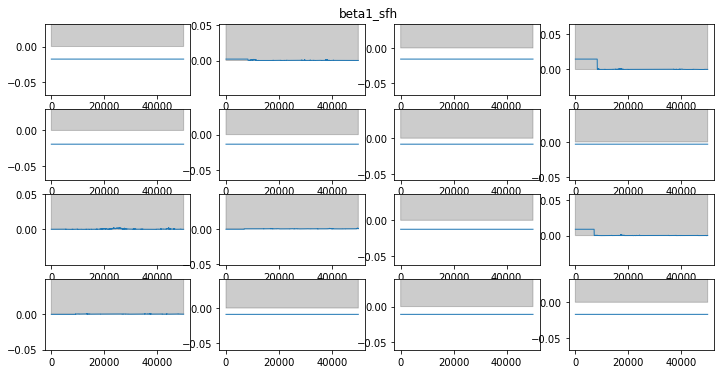

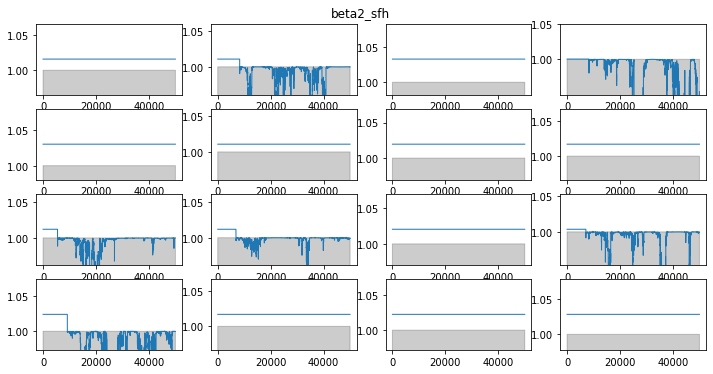

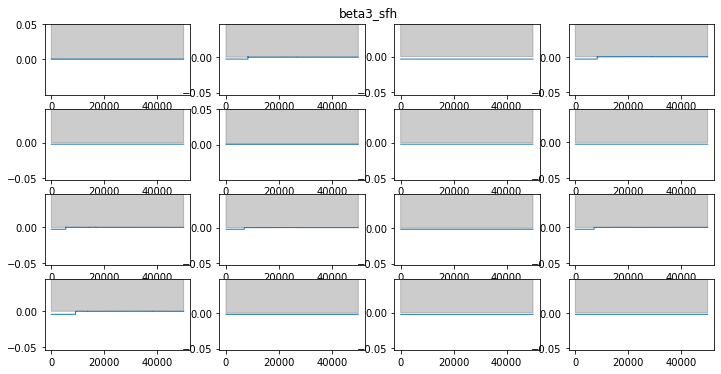

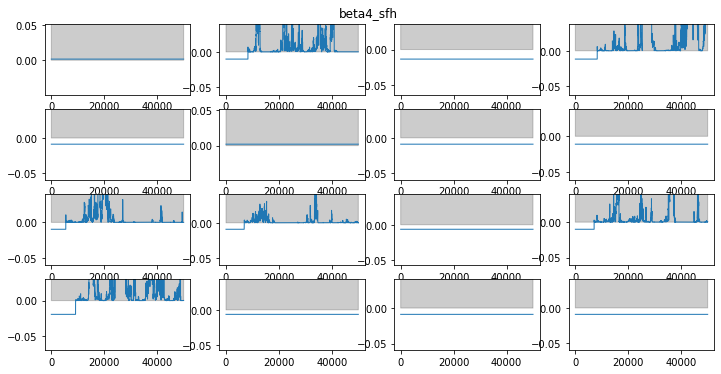

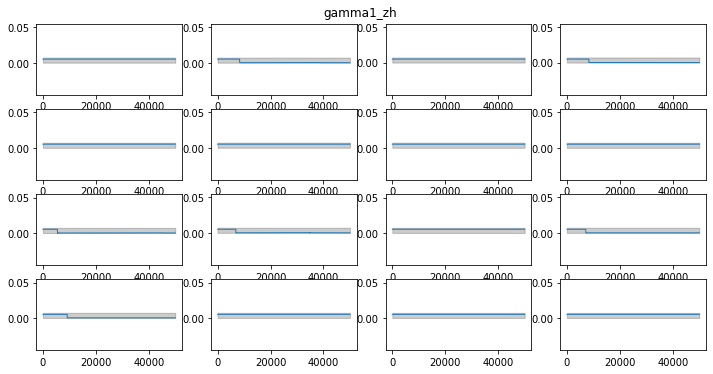

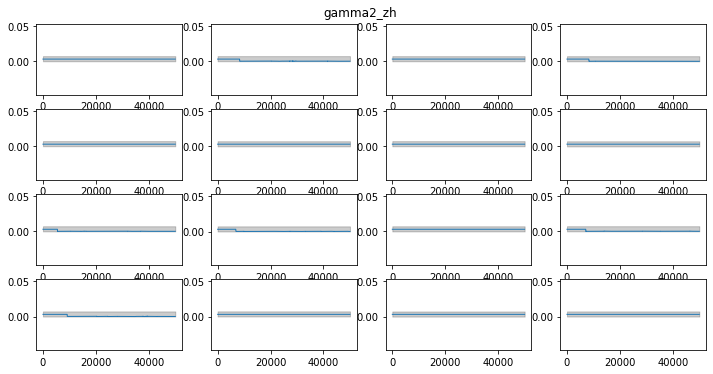

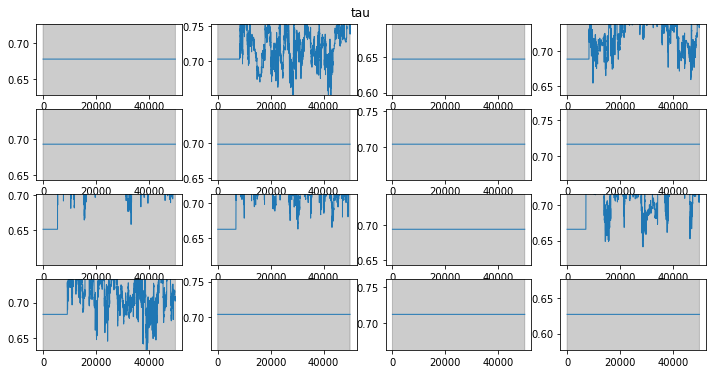

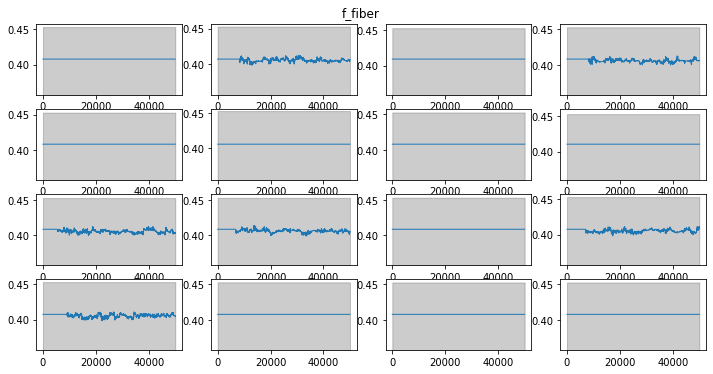

In [103]:
for ii in range(9):
    mcmc_s = f_s['mcmc_chain'][...][:,ii]
    prior_s = f_s['prior_range'][...][ii]
    fig, axs = plt.subplots(4,4, figsize = (12,6))
    fig.suptitle(tt_s[ii], y= 0.92)
    for n,i in enumerate(stat_idx):
        chain = mcmc_s[i::40]
#         axs[n//4,n%4].set_title(i)
        axs[n//4,n%4].plot(np.arange(len(chain)), chain, lw = 1)
        axs[n//4,n%4].fill_between(np.arange(len(chain)),y1 = prior_s[0],y2 = prior_s[1], color = 'k', alpha = 0.2)
        axs[n//4,n%4].set_ylim(chain[0]-0.05,chain[0]+0.05)
    plt.savefig(f'stationary_prior_{tt_s[ii]}.pdf', format = 'pdf')
    plt.show()

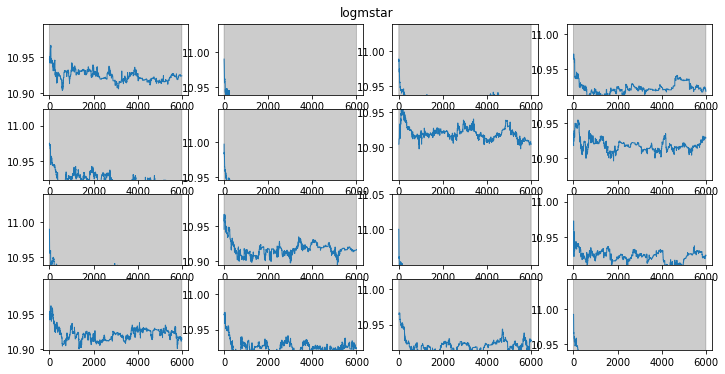

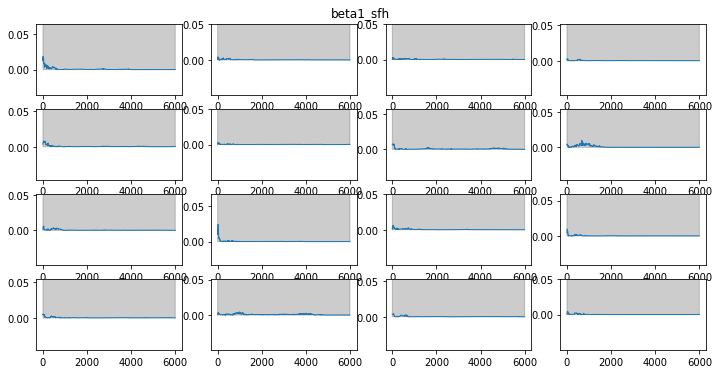

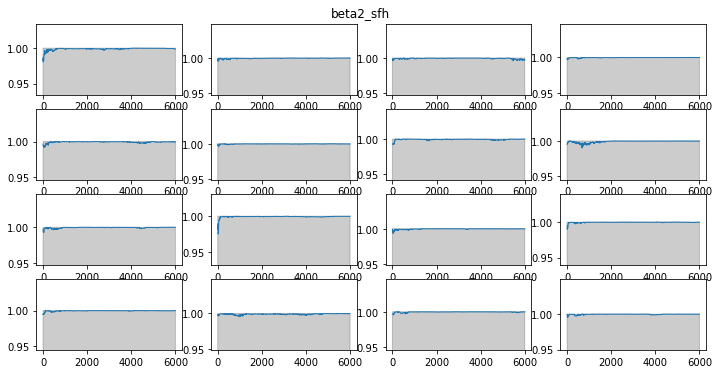

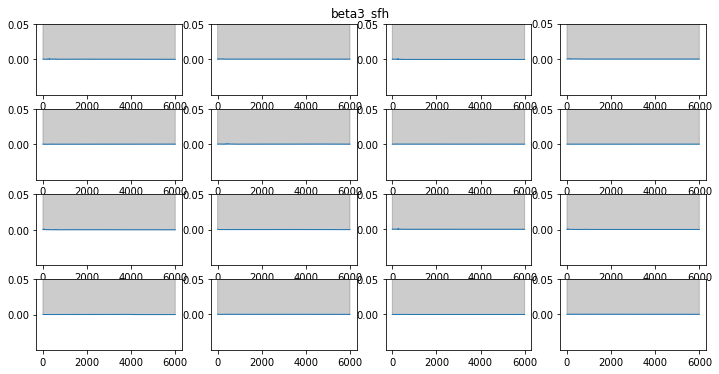

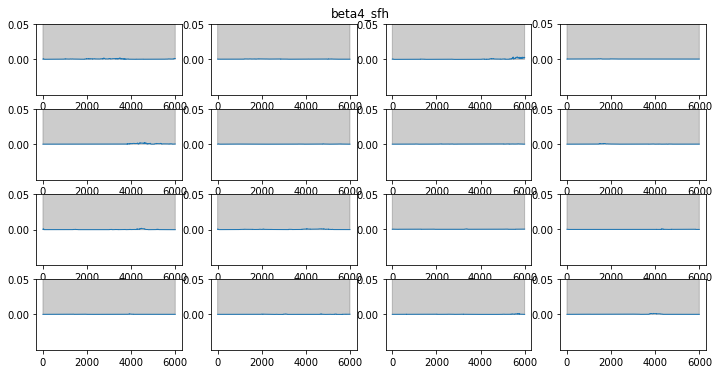

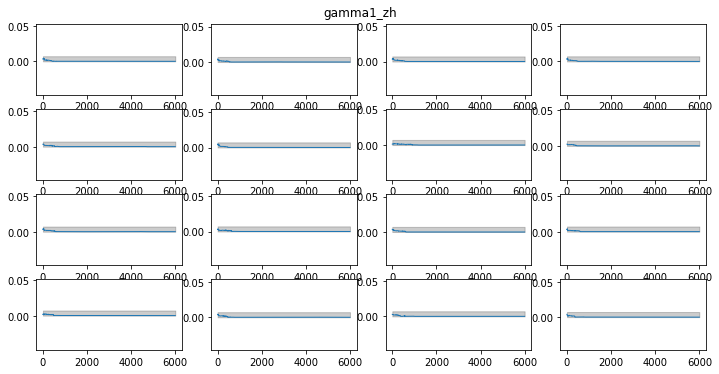

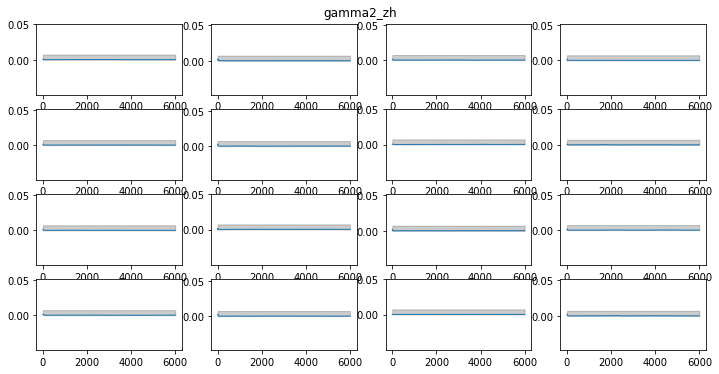

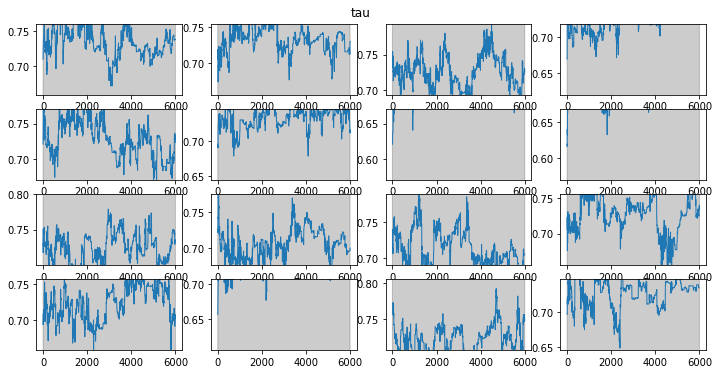

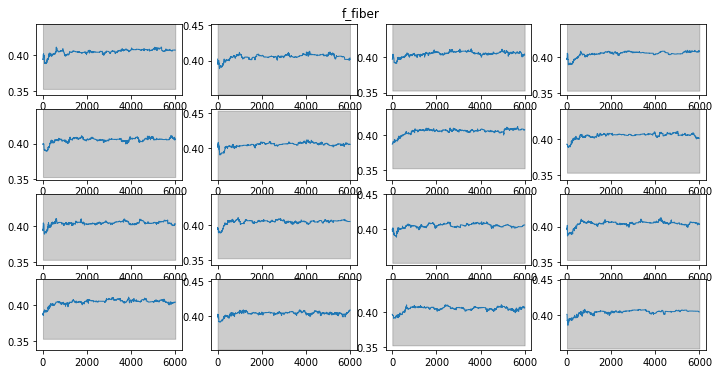

In [102]:
for ii in range(9):
    mcmc_s = f_ns['mcmc_chain'][...][:,ii]
    prior_s = f_ns['prior_range'][...][ii]
    fig, axs = plt.subplots(4,4, figsize = (12,6))
    fig.suptitle(tt_s[ii], y= 0.92)
    for n,i in enumerate(stat_idx):
        chain = mcmc_s[i::40]
#         axs[n//4,n%4].set_title(i)
        axs[n//4,n%4].plot(np.arange(len(chain)), chain, lw = 1)
        axs[n//4,n%4].fill_between(np.arange(len(chain)),y1 = prior_s[0],y2 = prior_s[1], color = 'k', alpha = 0.2)
        axs[n//4,n%4].set_ylim(chain[0]-0.05,chain[0]+0.05)
    plt.savefig(f'non_stationary_prior_{tt_s[ii]}.pdf', format = 'pdf')
    plt.show()